# Exploring Time Series Through a BitCoin DataSet
**Exploring using RNN, ARIMA, and LSTM**

In [1]:
import pandas as pd
# import pandas_profiling
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importing the data coming from 2 different reporting sources
coin_base_df = pd.read_csv("data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")
bit_stamp_df = pd.read_csv("data/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")

# convert the timestamp to datetime
coin_base_df['date'] = pd.to_datetime(coin_base_df['Timestamp'], unit='s').dt.date
bit_stamp_df['date'] = pd.to_datetime(bit_stamp_df['Timestamp'], unit='s').dt.date

# calculate the mean daily price
cb_mean_price = coin_base_df.groupby('date')['Weighted_Price'].mean()
bs_mean_price = bit_stamp_df.groupby('date')['Weighted_Price'].mean()

In [3]:
coin_base_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01


In [4]:
bit_stamp_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31


# RNN

**Preprocessing the data for input into a RNN**
* Extract the mean values
* Reshape the data from an array into a vector
* Scale the data using MinMaxScaler

In [7]:
# split both datasets into 30 dat intervals for predictions
prediction_days = 30

# extract mean values and reshape into a vector
cb_train = (cb_mean_price[:len(cb_mean_price)-prediction_days]
                .values.reshape(-1, 1))  # 1435 days
bs_train = (bs_mean_price[:len(bs_mean_price)-prediction_days]
                .values.reshape(-1, 1))  # 2597 days

# Separate the test set data and save for later
cb_test = cb_mean_price[len(cb_mean_price)-prediction_days:].values.reshape(-1,1)   # 30 days
bs_test = bs_mean_price[len(bs_mean_price)-prediction_days:].values.reshape(-1,1)   # 30 days

In [8]:
# scale the mean values using the MinMaxScaler and reshape the data for RNN
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

cb_train = mm_scaler.fit_transform(cb_train)
X_train_cb = cb_train[0:len(cb_train)-1].reshape(-1, 1, 1)
y_train_cb = cb_train[1:len(cb_train)]

bs_train = mm_scaler.fit_transform(bs_train)
X_train_bs = bs_train[0:len(bs_train)-1].reshape(-1, 1, 1)
y_train_bs = bs_train[1:len(bs_train)]

test_inputs_cb = mm_scaler.transform(cb_test).reshape(-1,1,1)
test_inputs_bs = mm_scaler.transform(bs_test).reshape(-1,1,1)

**Building the RNN model and using LSTM**
* LSTM - Long Short-Term Memory Units
* Research why LSTM ???

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [10]:
# Initialize the RNN
regressor = Sequential()

# Add input and LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Add output layer
regressor.add(Dense(units = 1))

# Compile the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fit the RNN to the training set
history_cb = regressor.fit(X_train_cb, y_train_cb, batch_size = 5, epochs = 100, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1434/1434 [==============================] - 1s 742us/step - loss: 0.1059
Epoch 2/100
1434/1434 [==============================] - 1s 380us/step - loss: 0.0319
Epoch 3/100
1434/1434 [==============================] - 1s 373us/step - loss: 0.0281
Epoch 4/100
1434/1434 [==============================] - 1s 375us/step - loss: 0.0242
Epoch 5/100
1434/1434 [==============================] - 1s 371us/step - loss: 0.0202
Epoch 6/100
1434/1434 [==============================] - 1s 389us/step - loss: 0.0162
Epoch 7/100
1434/1434 [==============================] - 1s 372us/step - loss: 0.0123
Epoch 8/100
1434/1434 [==============================] - 1s 374us/step - loss: 0.0087
Epoch 9/100
1434/1434 [==============================] - 1s 382us/step - loss: 0.0057
Epoch 10/100
1434/1434 [==============================] - 1s 390us/step - loss: 0.0034
Epoch 11/100
1434/1

1434/1434 [==============================] - 1s 385us/step - loss: 1.4918e-04
Epoch 86/100
1434/1434 [==============================] - 1s 376us/step - loss: 1.4691e-04
Epoch 87/100
1434/1434 [==============================] - 1s 370us/step - loss: 1.4570e-04
Epoch 88/100
1434/1434 [==============================] - 1s 372us/step - loss: 1.4875e-04
Epoch 89/100
1434/1434 [==============================] - 1s 373us/step - loss: 1.4725e-04
Epoch 90/100
1434/1434 [==============================] - 1s 368us/step - loss: 1.5132e-04
Epoch 91/100
1434/1434 [==============================] - 1s 368us/step - loss: 1.4604e-04
Epoch 92/100
1434/1434 [==============================] - 1s 370us/step - loss: 1.4869e-04
Epoch 93/100
1434/1434 [==============================] - 1s 366us/step - loss: 1.4836e-04
Epoch 94/100
1434/1434 [==============================] - 1s 376us/step - loss: 1.4540e-04
Epoch 95/100
1434/1434 [==============================] - 1s 368us/step - loss: 1.4881e-04
Epoch 96/100

In [11]:
# Initialize the RNN
regressor = Sequential()

# Add input and LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Add output layer
regressor.add(Dense(units = 1))

# Compile the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fit the RNN to the training set
history_bs = regressor.fit(X_train_bs, y_train_bs, batch_size = 5, epochs = 100, verbose=1)

Epoch 1/100
2596/2596 [==============================] - 2s 615us/step - loss: 0.0246
Epoch 2/100
2596/2596 [==============================] - 1s 402us/step - loss: 0.0206 0s
Epoch 3/100
2596/2596 [==============================] - 1s 483us/step - loss: 0.0163
Epoch 4/100
2596/2596 [==============================] - 1s 460us/step - loss: 0.0114
Epoch 5/100
2596/2596 [==============================] - 1s 443us/step - loss: 0.0064
Epoch 6/100
2596/2596 [==============================] - 1s 437us/step - loss: 0.0027
Epoch 7/100
2596/2596 [==============================] - 1s 470us/step - loss: 7.7359e-04
Epoch 8/100
2596/2596 [==============================] - 1s 570us/step - loss: 1.8173e-04
Epoch 9/100
2596/2596 [==============================] - 1s 396us/step - loss: 8.9315e-05
Epoch 10/100
2596/2596 [==============================] - 1s 390us/step - loss: 8.4955e-05
Epoch 11/100
2596/2596 [==============================] - 1s 385us/step - loss: 8.5493e-05
Epoch 12/100
2596/2596 [=====

2596/2596 [==============================] - 1s 366us/step - loss: 8.7047e-05
Epoch 91/100
2596/2596 [==============================] - 1s 371us/step - loss: 8.4876e-05
Epoch 92/100
2596/2596 [==============================] - 1s 369us/step - loss: 8.5052e-05
Epoch 93/100
2596/2596 [==============================] - 1s 367us/step - loss: 8.7129e-05
Epoch 94/100
2596/2596 [==============================] - 1s 364us/step - loss: 8.4867e-05
Epoch 95/100
2596/2596 [==============================] - 1s 362us/step - loss: 8.7024e-05
Epoch 96/100
2596/2596 [==============================] - 1s 368us/step - loss: 8.6969e-05
Epoch 97/100
2596/2596 [==============================] - 1s 365us/step - loss: 8.7298e-05
Epoch 98/100
2596/2596 [==============================] - 1s 375us/step - loss: 8.5749e-05 0s - loss: 9.2954
Epoch 99/100
2596/2596 [==============================] - 1s 383us/step - loss: 8.6656e-05
Epoch 100/100
2596/2596 [==============================] - 1s 371us/step - loss: 8.77

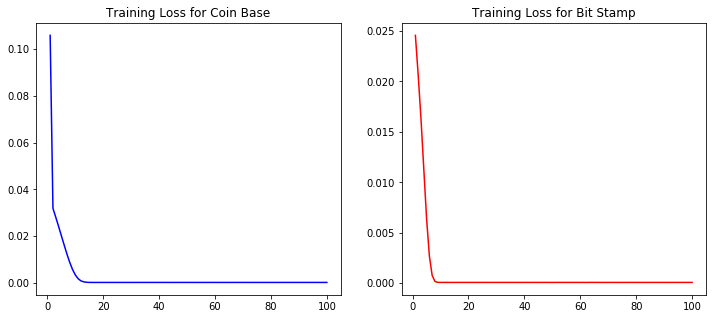

In [12]:
loss_cb = history_cb.history['loss']
epochs_cb = range(1, len(loss_cb)+1)

loss_bs = history_bs.history['loss']
epochs_bs = range(1, len(loss_bs)+1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_cb, loss_cb, color='b')
plt.title('Training Loss for Coin Base')
plt.subplot(1,2,2)
plt.plot(epochs_bs, loss_bs, color='r')
plt.title('Training Loss for Bit Stamp');

**NOTE!!!** 
Key thing is following and that is why NN COULD "fail". WE used values of today to predict the future values. That is not really failure of NN but just goes to show that we need to think about what are we "feeding" our NN. Because it can happen that NN will only learn that price will be slightly higher than yesterdays price. Which is true, except when it is not. Than we fail big.

In [13]:
# Making the predictions

cb_test_df = cb_mean_price[len(cb_mean_price)-prediction_days:]   # 30 days
bs_test_df = bs_mean_price[len(bs_mean_price)-prediction_days:]   # 30 days

test_inputs_cb = mm_scaler.transform(cb_test).reshape(-1,1,1)
test_inputs_bs = mm_scaler.transform(bs_test).reshape(-1,1,1)

predicted_price_cb = regressor.predict(test_inputs_cb)
predicted_price_cb = mm_scaler.inverse_transform(predicted_price_cb)

predicted_price_bs = regressor.predict(test_inputs_bs)
predicted_price_bs = mm_scaler.inverse_transform(predicted_price_bs)

In [17]:
cb_test_df.head(2)

,index,date,Weighted_Price
0,0,2018-12-09,3468.663403
1,1,2018-12-10,3469.771366


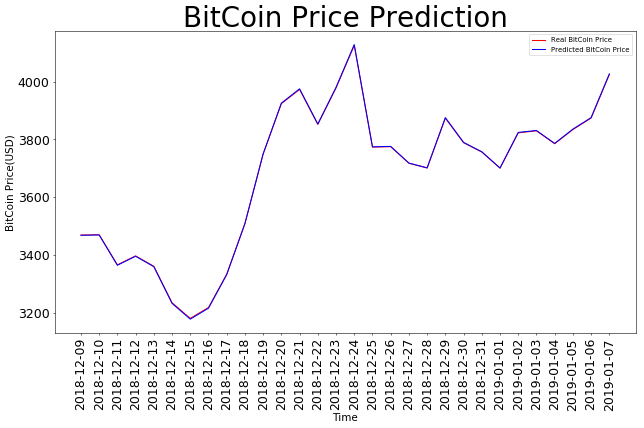

In [20]:
# Visualizing the results
plt.figure(figsize=(15,8), dpi=50, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(cb_test_df.Weighted_Price, color = 'red', label = 'Real BitCoin Price')
plt.plot(predicted_price_cb, color = 'blue', label = 'Predicted BitCoin Price')
plt.title('BitCoin Price Prediction', fontsize=40)

# cb_test_df = cb_test_df.reset_index()
x = cb_test_df.index
labels = cb_test_df['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=15)
plt.ylabel('BitCoin Price(USD)', fontsize=15)
plt.legend();

# ARIMA
* It is a series which needs to be differentiated in order to be made stationary is an “integrated” **(I)** series.

* Lags of the stationarized series are called “autoregressive” that refers to **(AR)** terms & Lags of the forecast errors are called “moving average” which refers to **(MA)** terms.

* It is basically used for forecasting

* Arima is a Generalized random walk models which is fine-tuned to eliminate all residual autocorrelation.

* It is a Generalized exponential smoothing model that can incorporate long-term trends and seasonality.

* The Stationarized regression model uses lags of the dependent variables and/or lags of the forecast errors as regressors.

* Here the forecasting model of time series can be stationarized by using transformations like differencing, logging and deflating.

* By this we can say that a time series is “Stationary” if all the Statistical properties like mean, variance, autocorrelation etc. are constant in time.


* Each of the AR.I.MA components are explicitly specified in the model as a parameter. 

* A standard notation is used of **ARIMA(p, d, q)** where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

*Parameters are defined as follows:*

* **p:** The number of lag observations included in the model, also called the lag order.
* **d:** The number of times that the raw observations are differenced, also called the degree of differencing.
* **q:** The size of the moving average window, also called the order of moving average.


**IMPORTANT**

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.

But how do we check that? And how to de determine the parameters p,d,q in the model? First of all we need to make sure that the time-series is stationary, thats where differencing comes into place (degree corrects the level of non-stationarity if possible) And model parameters can be determined with the Box-Jenkins Method.

Basicaly we have the following situation:

Define the model by calling ARIMA() and passing in the p, d, and q parameters.
The model is prepared on the training data by calling the fit() function.
Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

In [21]:
# Import libraries
import numpy as np
from scipy import stats
import statsmodels.api as sm
from itertools import product
from datetime import datetime

import seaborn as sns
import matplotlib as mpl
plt.style.use('seaborn-poster')

import warnings
warnings.filterwarnings('ignore')

In [34]:
bit_df = pd.read_csv("data/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")

# transform index to time delta and split on time intervals
# Unix-time to 
bit_df['Timestamp'] = pd.to_datetime(bit_df['Timestamp'], unit='s')

# # Resampling to daily frequency
bit_df.index = bit_df['Timestamp']
bit_df = bit_df.resample('D').mean()

# # Resampling to monthly frequency
bit_df_month = bit_df.resample('M').mean()

# # Resampling to annual frequency
bit_df_year = bit_df.resample('A-DEC').mean()

# # Resampling to quarterly frequency
bit_df_Q = bit_df.resample('Q-DEC').mean()

In [29]:
bit_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


**Visualize the trends**

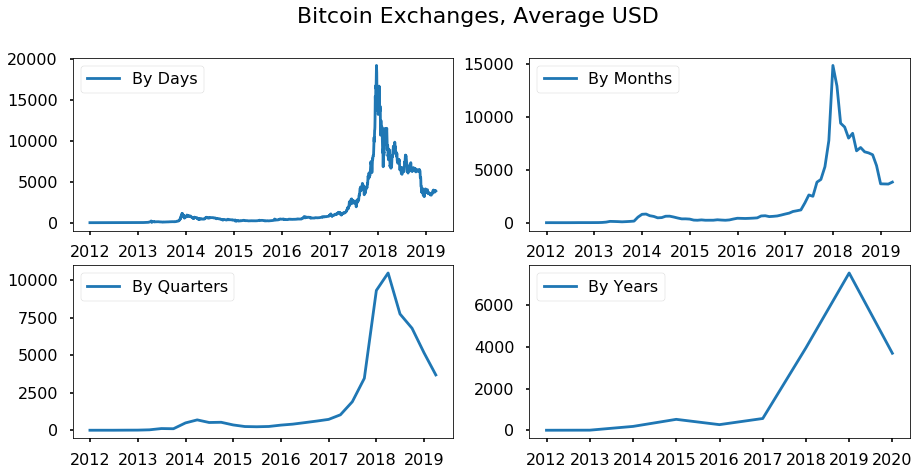

In [39]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin Exchanges, Average USD', fontsize=22)

plt.subplot(221)
plt.plot(bit_df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(bit_df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(bit_df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(bit_df_year.Weighted_Price, '-', label='By Years')
plt.legend();

**Stationarity check and STL-decomposition of the series**   
* The lower the p value the better. 
* Stationarity is our models main assumption and dickey fuller is just hypothesis test of the unit root test

Dickey–Fuller test: p = 0.36269287711268383


<Figure size 1080x504 with 0 Axes>

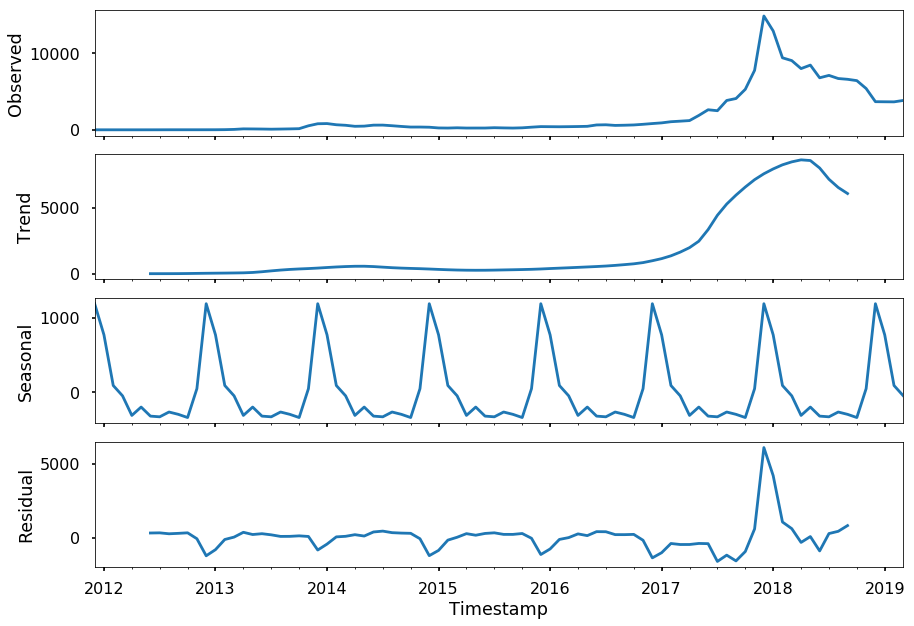

In [44]:
# Check the Dickey-Fuller test with the data
plt.figure(figsize=[15,7]);
sm.tsa.seasonal_decompose(bit_df_month['Weighted_Price']).plot();
print("Dickey–Fuller test: p = {}".format(sm.tsa.stattools.adfuller(bit_df_month['Weighted_Price'])[1]));

**p-value** is too high, thus the data must be transformed.

In [50]:
# Box-Cox Transformation to check the Dickey-Fuller test
bit_df_month['Weighted_Price_box'], lmbda = stats.boxcox(bit_df_month.Weighted_Price)
print("Dickey–Fuller test: p = {}".format(sm.tsa.stattools.adfuller(bit_df_month['Weighted_Price_box'])[1]))

Dickey–Fuller test: p = 0.5967406874008391


Try another transformation: **Seasonal differentiation**
* In monthly data, seasonal shifts by 12.

In [51]:
# Seasonal differentiation
bit_df_month['prices_box_diff'] = bit_df_month['Weighted_Price_box'] - bit_df_month['Weighted_Price_box'].shift(12)
print("Dickey–Fuller test: p = {}".format(sm.tsa.stattools.adfuller(bit_df_month['prices_box_diff'][12:])[1]))

Dickey–Fuller test: p = 0.2733519182540163


Better but series is not stationary still. Finally try: **Regular or first differentiation**
* Shifts by one 

Dickey–Fuller test: p = 2.9531991338358763e-05


<Figure size 1080x504 with 0 Axes>

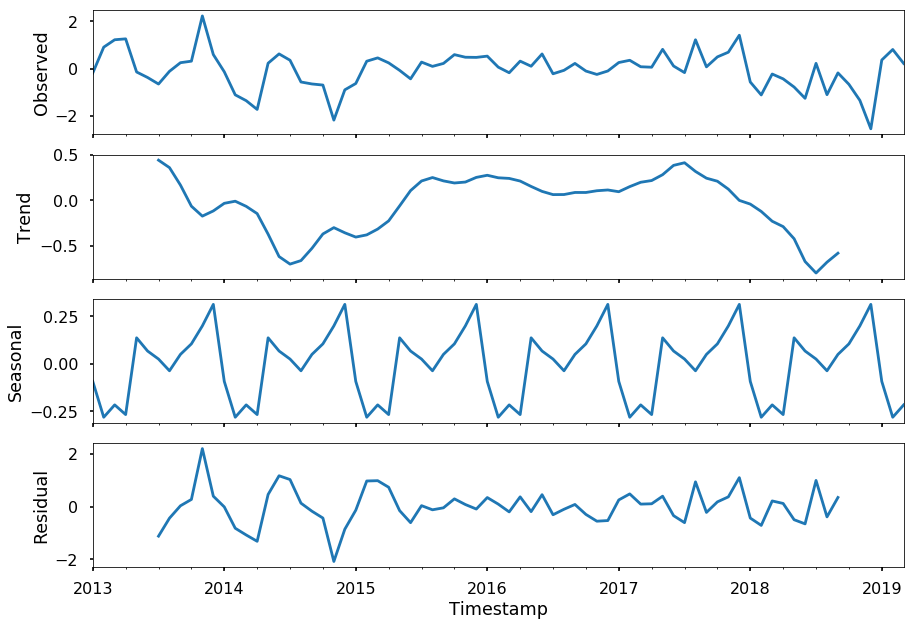

In [60]:
# Regular or first differentiation
bit_df_month['prices_box_diff2'] = bit_df_month['prices_box_diff'] - bit_df_month['prices_box_diff'].shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(bit_df_month['prices_box_diff2'][13:]).plot()   
print("Dickey–Fuller test: p = {}".format(sm.tsa.stattools.adfuller(bit_df_month['prices_box_diff2'][13:])[1]))

Finally a *low p-value*!

Now we need to do **model selection**, with the help of:

* **Autocorrelation Function (ACF)**. 
    * The plot summarizes the correlation of an observation with lag values. 
    * The x-axis shows the lag and the y-axis shows the correlation coefficient between -1 and 1 for negative and positive correlation.
* **Partial Autocorrelation Function (PACF)**. 
    * The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations. 
    * We can get a basic picture of the parameter interval. 
    * Using this heuristic (with help of **AIC- Akaike Information Criterion**) we can decide which are the best *p, q, d* for ARIMA

In [73]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D = 1
d = 1
parameters = list(product(ps, qs, Ps, Qs))
len(parameters)

54

In [74]:
# Model Selection
results = []
best_aic = float("inf")

for param in parameters:
    try:
        model = sm.tsa.statespace.SARIMAX(bit_df_month['Weighted_Price_box'], 
                                          order=(param[0], d, param[1]), 
                                          seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (2, 1, 0, 0)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 0)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 1, 2, 0)
wrong parameters: (2, 1, 2, 1)


In [75]:
# Best Models
result_table = pd.DataFrame(results, columns=['parameters', 'aic'])

print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
21  (1, 0, 1, 1)  118.068189
9   (0, 1, 1, 1)  119.846605
23  (1, 0, 2, 1)  120.019958
39  (2, 0, 1, 1)  120.046763
27  (1, 1, 1, 1)  120.048287
                                 Statespace Model Results                                 
Dep. Variable:                 Weighted_Price_box   No. Observations:                   88
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 12)   Log Likelihood                 -55.034
Date:                            Wed, 26 Jun 2019   AIC                            118.068
Time:                                    12:11:23   BIC                            127.338
Sample:                                12-31-2011   HQIC                           121.770
                                     - 03-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

In [76]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

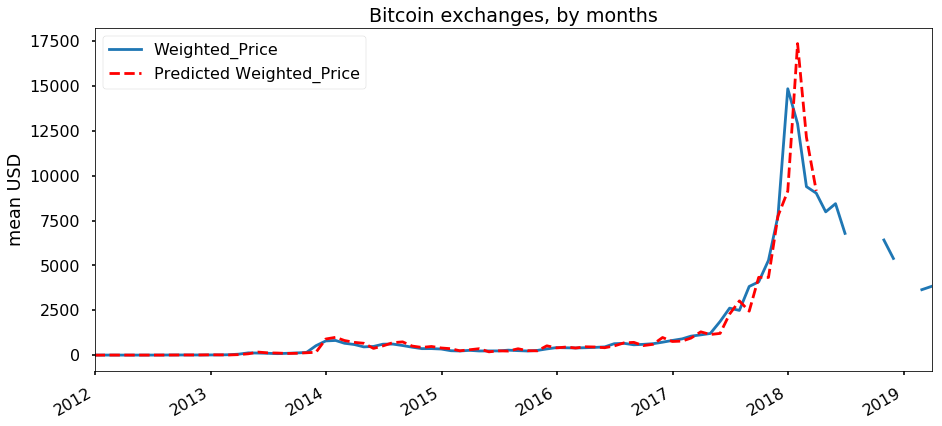

In [78]:
# Prediction
bit_df_month2 = bit_df_month[['Weighted_Price']]
date_list = [datetime(2018, 6, 30), datetime(2018, 7, 31), datetime(2018, 8, 31), datetime(2018, 9, 30), 
             datetime(2018, 10, 31), datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31),
             datetime(2019, 1, 28)]
future = pd.DataFrame(index=date_list, columns= bit_df_month.columns)
bit_df_month2 = pd.concat([bit_df_month2, future])
bit_df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
bit_df_month2['Weighted_Price'].plot()
bit_df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD');